# **Results**

### Basic setup:

In [1]:
# magics
%load_ext autoreload
%autoreload 2

# load general packages
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# load modules
from model_new import model_bufferstock

/var/folders/67/5lclr44x13d7lzxtqq4c11r40000gn/T/ipykernel_2709/3684740992.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [8]:
model = model_bufferstock()

In [9]:
sol = model.sol
par = model.par

model.setup()

In [10]:
model.solve()

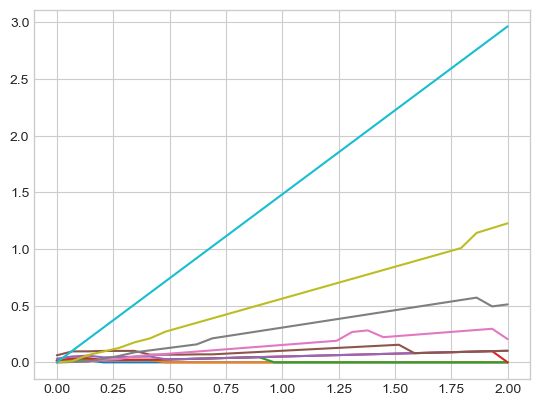

In [12]:
for t in range(par.T):
    plt.plot(sol.grid_w[t,:], sol.c[t,:,15])

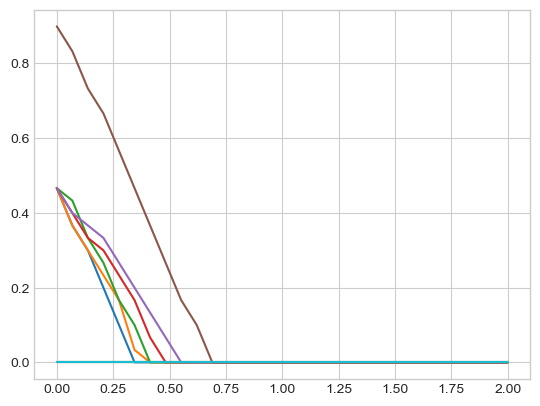

In [13]:
for t in range(par.T):
    plt.plot(sol.grid_w[t,:], sol.d[t,:,15])

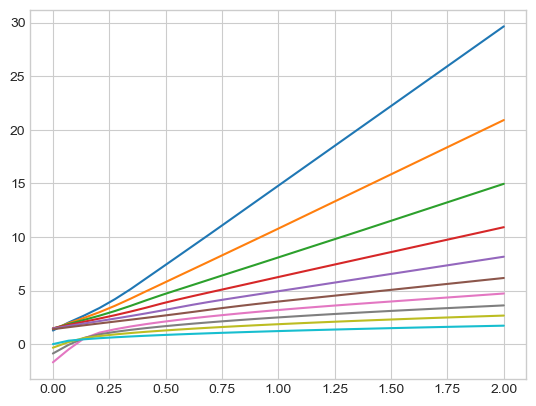

In [14]:
for t in range(par.T):
    plt.plot(sol.grid_w[t,:], sol.v[t,:,15])